In [21]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 超参数
input_size = 1
output_size = 1
num_epochs =60
learning_rate=0.001


In [7]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [9]:
model = nn.Linear(input_size,output_size)

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [19]:
for epoch in range(num_epochs):
    inputs =torch.tensor(x_train)
    outputs = model(inputs)
    
    target = torch.tensor(y_train)
    loss= criterion(outputs,target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if((epoch+1)%5==0):
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 0.1703
Epoch [10/60], Loss: 0.1703
Epoch [15/60], Loss: 0.1703
Epoch [20/60], Loss: 0.1703
Epoch [25/60], Loss: 0.1703
Epoch [30/60], Loss: 0.1703
Epoch [35/60], Loss: 0.1703
Epoch [40/60], Loss: 0.1703
Epoch [45/60], Loss: 0.1703
Epoch [50/60], Loss: 0.1703
Epoch [55/60], Loss: 0.1703
Epoch [60/60], Loss: 0.1703


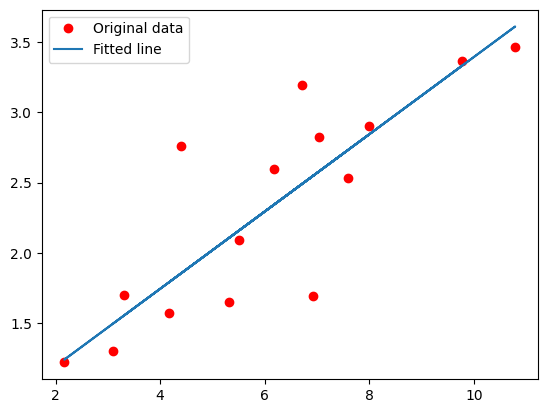

In [22]:
predicted = model(torch.tensor(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [23]:
torch.save(model.state_dict(),'linear_model.ckpt')